In [1]:
#2.1 nạp ảnh sử dụng thư viện Python Image Library(PIL)
from PIL import Image
import numpy as np
img = Image.open('bird.png')
img.show()


Matplotlib is building the font cache; this may take a moment.


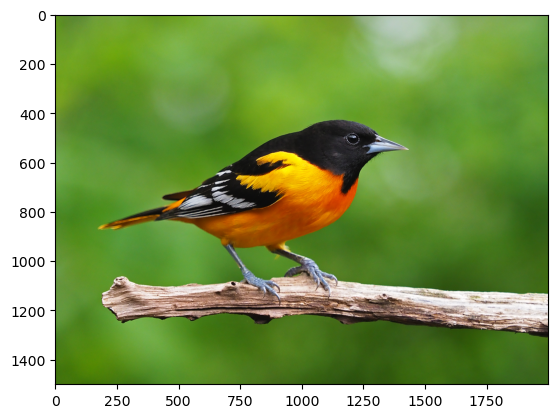

In [2]:
#2.2 Nạp ảnh sử dụng lệnh thư viện imageio
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png')
plt.imshow(data)
plt.show()

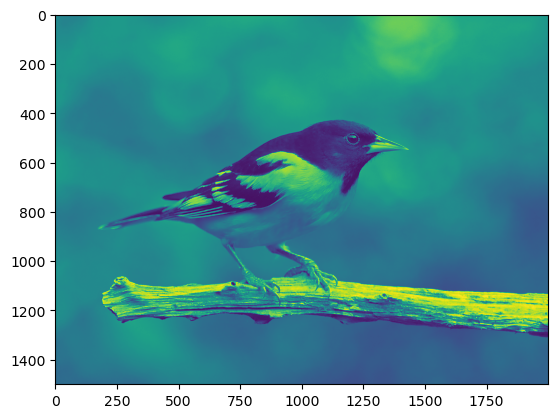

In [6]:
#2.3 Độ phân giải ảnh
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png', mode='F')
plt.imshow(data)
plt.show()

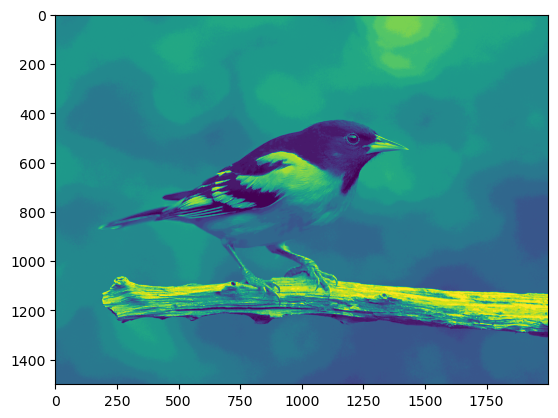

In [9]:
#2.3
import numpy as np 
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png', mode = 'F'). astype(np.uint8)
cl = data & 0xF0
iio.imsave('birdfO.png',cl)
tmp = iio.imread('birdfO.png')
plt.imshow(tmp)
plt.show()

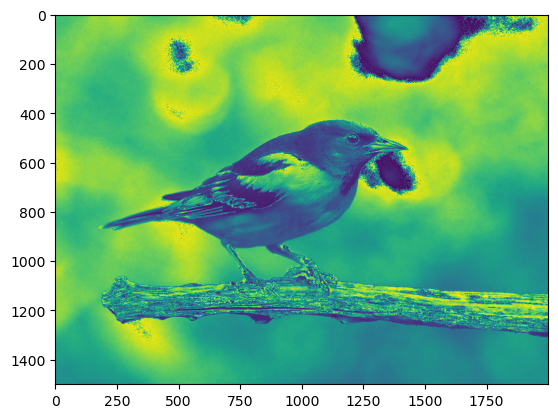

In [10]:
#2.4 Màu sắc với hệ RGB
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png')
bdata = (data[:,:,1] + data[:,:,2])
plt.imshow(bdata)
plt.show()

In [12]:
##2.5 Màu sắc với hệ HSV
import numpy as np 
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys

a = colorsys.rgb_to_hsv(255,0,0)
print(a)
b = colorsys.rgb_to_hsv(1,0,0)
print(b)
c = colorsys.rgb_to_hsv(0,255,0)
print(c)
d = colorsys.hsv_to_rgb(1,1,255)
print(d)

(0.0, 1.0, 255)
(0.0, 1.0, 1)
(0.3333333333333333, 1.0, 255)
(255, 0.0, 0.0)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


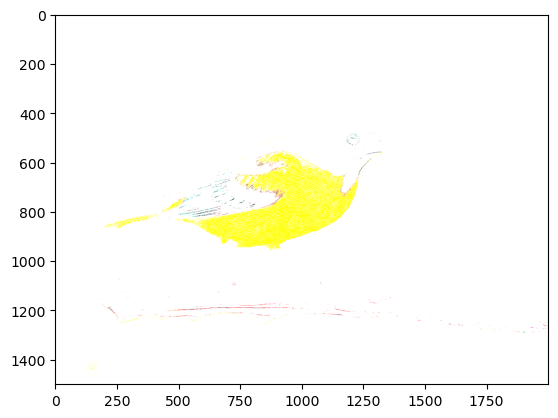

In [15]:
#2.6 Ứng dụng chuyển đôi hệ màu
import numpy as np 
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys
rgb = iio.imread('bird.png')
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
h, s, v = rgb2hsv(rgb[:,:,0],rgb[:,:,1], rgb[:,:,2])
h *= h
hsv2rgb = np.vectorize(colorsys.hsv_to_rgb)
rgb2 = hsv2rgb(h, s, v)
rgb2 = np.array(rgb2).transpose((1, 2, 0))
plt.imshow(rgb2)
plt.show()

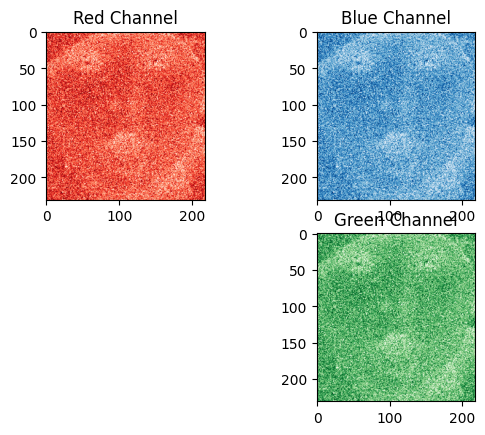

(231, 218, 3)

In [30]:
#BT1 viết chương trình nạp 1 ảnh và lưu 3 ảnh với 3 màu khác nhau
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt 
data = iio.imread("exercise/baby.jpeg")
do = data[:, :, 0]
xanhla = data[:, :, 1]
xanhduong = data[:, :, 2]
iio.imsave('do.png', do)

plt.subplot(2, 2, 1)
plt.title("Red Channel")
plt.imshow(data[:, :, 0], cmap = 'Reds')
plt.subplot(2, 2, 2)
plt.title("Blue Channel")
plt.imshow(data[:, :, 2], cmap = 'Blues')
plt.subplot(2, 2, 4)
plt.title("Green Channel")
plt.imshow(data[:, :, 1], cmap = 'Greens')
plt.show()
data.shape

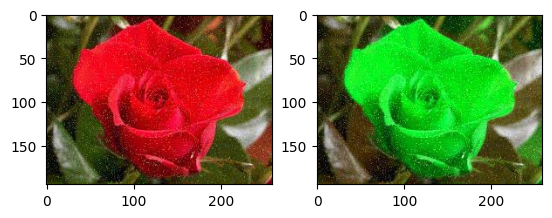

In [3]:
##BT2 viết chương trình nạp một ảnh và hoán đổi giá trị các màu. Lưu các ảnh vào máy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt 
data = iio.imread('exercise/flower.jpeg')
swapped = data[:, :, [1, 0, 2]]
iio.imwrite('exercise/flower_xanhla.jpeg', swapped)
plt.subplot(1,2,1)
plt.imshow(data)
plt.subplot(1,2,2)
plt.imshow(swapped)
plt.show()

In [4]:
##BT3 Viết chương trình nạp vào một ảnh, chuyển thành hệ màu HSV và lưu 3 ảnh với 3 màu khác nhau.
import numpy as np 
import imageio.v2 as iio 
import matplotlib.pylab as plt
import colorsys
img = iio.imread('exercise/flower.jpeg')
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
h, s, v = rgb2hsv(img[:,:,0]/255, img[:,:,1]/255, img[:,:,2]/255)
iio.imwrite('exercise/hue.png', (h * 255).astype(np.uint8))
iio.imwrite('exercise/sat.png', (s * 255).astype(np.uint8))
iio.imwrite('exercise/val.png', (v * 255).astype(np.uint8))

In [5]:
##BT4 Viết chương trinhg nạp 1 ảnh , chuyển sang hệ màu HSV. Lưu ảnh mới với kênh H new = 1/3 H old, V new= 3/4V old.
import numpy as np 
import imageio.v2 as iio 
import matplotlib.pylab as plt
import colorsys
h = h/ 3
v = v * 0.75
hsv2rgb = np.vectorize(colorsys.hsv_to_rgb)
r ,g ,b = hsv2rgb(h,s,v)
rgb_new = np.dstack((r , g, b))*255
iio.imwrite('exercise/hsv_modified.png', rgb_new.astype(np.uint8))

[[152 161 150 ... 188 193 197]
 [153 160 151 ... 185 191 196]
 [153 157 144 ... 190 201 203]
 ...
 [ 58  68  56 ...  90  85  83]
 [ 44  54  47 ...  84  74  74]
 [ 58  62  48 ...  80  73  70]]


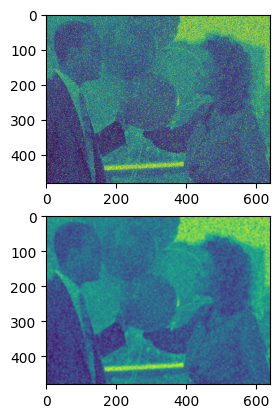

In [ ]:
##Lọc ảnh với mean filter
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys
a = iio.imread('exercise/balloons_noisy.png', mode = 'F')
k = np.ones((5,5))/25
b = sn.convolve(a, k).astype(np.uint8)
iio.imsave('exercise/balloons_noisy_mean_filter.png', b)
print(b)
plt.subplot(2, 1, 1)
plt.imshow(a)
plt.subplot(2, 1, 2)
plt.imshow(b)
plt.show()

[[162 162 159 ... 210 210 209]
 [151 159 151 ... 210 210 210]
 [151 158 149 ... 210 211 210]
 ...
 [ 10  11  11 ...  65  67  67]
 [ 10  10  11 ...  65  67  67]
 [ 10  10  10 ...  65  67  67]]


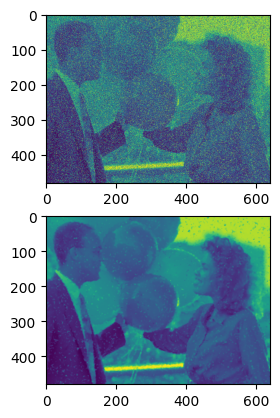

In [ ]:
##Lọc ảnh với median filter
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys

a = iio.imread('exercise/balloons_noisy.png', mode = 'F').astype(np.uint8)
b = sn.median_filter(a, size=5, footprint=None, output=None, mode='reflect', cval=0.0, origin=0)
iio.imsave('exercise/balloons_noisy_mean_filter.png', b)
print(b)
plt.subplot(2, 1, 1)
plt.imshow(a)
plt.subplot(2, 1, 2)
plt.imshow(b)
plt.show()

[[214 217 217 ... 242 242 222]
 [214 217 217 ... 242 242 222]
 [214 217 217 ... 242 242 222]
 ...
 [182 182 182 ... 230 187 187]
 [182 182 182 ... 230 181 132]
 [182 182 182 ... 185 181 132]]


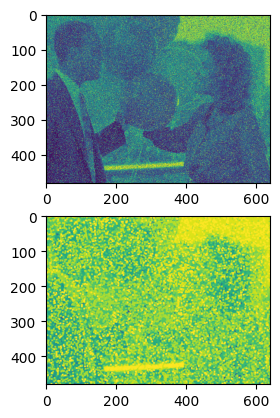

In [10]:
##Lọc ảnh với max filter

import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys
a = iio.imread('exercise/balloons_noisy.png', mode = 'F').astype(np.uint8)
b = sn.maximum_filter(a, size=5, footprint=None, output=None, mode='reflect', cval=0.0, origin=0)
iio.imsave('exercise/balloons_noisy_mean_filter.png', b)
print(b)
plt.subplot(2, 1, 1)
plt.imshow(a)
plt.subplot(2, 1, 2)
plt.imshow(b)
plt.show()

[[60 60 49 ... 28 76 76]
 [60 60 47 ... 28 76 76]
 [60 60 47 ... 28 76 76]
 ...
 [ 8  6  6 ...  0  0  0]
 [ 8  6  6 ...  0  0  0]
 [ 9  6  6 ...  0  0  0]]


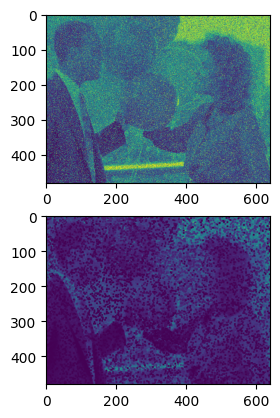

In [11]:
##Lọc ảnh với Min filter

import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys
a = iio.imread('exercise/balloons_noisy.png', mode = 'F').astype(np.uint8)
b = sn.minimum_filter(a, size=5, footprint=None, output=None, mode='reflect', cval=0.0, origin=0)
iio.imsave('exercise/balloons_noisy_mean_filter.png', b)
print(b)
plt.subplot(2, 1, 1)
plt.imshow(a)
plt.subplot(2, 1, 2)
plt.imshow(b)
plt.show()

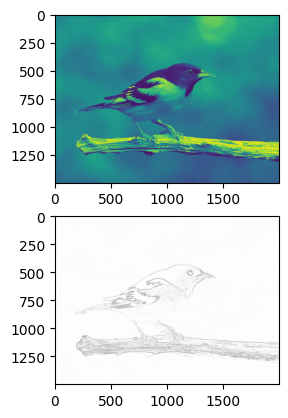

In [18]:
##Sobel filter
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import filters
import matplotlib.pylab as plt
import colorsys
a = iio.imread('bird.png', mode ='F')
b = filters.sobel(a).astype(np.uint8)
iio.imsave('bird_sobel_filter.png',255-b)
#print(a)
#print(b)
plt.subplot(2, 1, 1)
plt.imshow(a)
plt.subplot(2, 1, 2)
plt.imshow(255-b, cmap = 'gray')
plt.show()

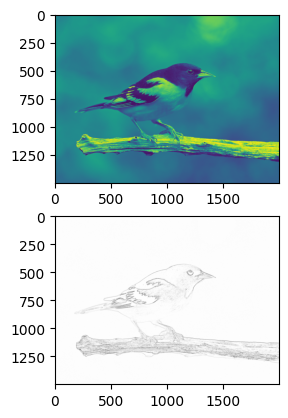

In [20]:
#Prewitt filter
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import filters
import matplotlib.pylab as plt
import colorsys
a = iio.imread('bird.png', mode ='F')
b = filters.prewitt(a).astype(np.uint8)
iio.imsave('bird_prewitt_filter.png',255-b)
#print(a)
#print(b)
plt.subplot(2, 1, 1)
plt.imshow(a)
plt.subplot(2, 1, 2)
plt.imshow(255-b, cmap = 'gray')
plt.show()

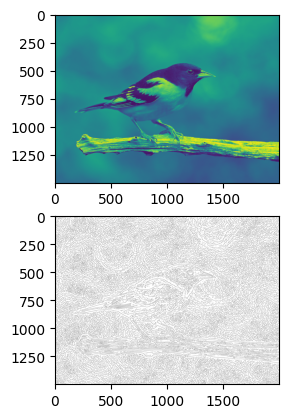

In [23]:
##Canny filter
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import feature
import matplotlib.pylab as plt
import colorsys
a = iio.imread('bird.png', mode ='F')
b = feature.canny(a, sigma=3).astype(np.uint8)
iio.imsave('bird_canny_filter.png',255-b)
#print(a)
#print(b)
plt.subplot(2, 1, 1)
plt.imshow(a)
plt.subplot(2, 1, 2)
plt.imshow(255-b, cmap = 'gray')
plt.show()

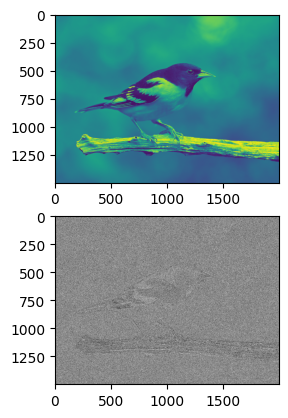

In [ ]:

import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
from skimage import feature
import matplotlib.pylab as plt
import colorsys
a = iio.imread('bird.png', mode ='F')
b = sn.laplace(a, mode='reflect').astype(np.uint8)
iio.imsave('bird_canny_filter.png',255-b)
#print(a)
#print(b)
plt.subplot(2, 1, 1)
plt.imshow(a)
plt.subplot(2, 1, 2)
plt.imshow(255-b, cmap = 'gray')
plt.show()

[[181 177 175 ... 163 149 134]
 [181 178 176 ... 158 146 136]
 [174 174 173 ... 161 155 146]
 ...
 [174 170 168 ... 139 135 125]
 [176 171 166 ... 137 134 125]
 [168 164 165 ... 142 138 129]]


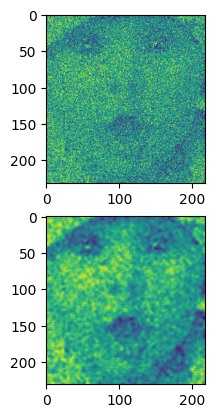

In [25]:
#BT5
##Lọc ảnh với mean filter
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys
a = iio.imread('exercise/baby.jpeg', mode = 'F')
k = np.ones((5,5))/25
b = sn.convolve(a, k).astype(np.uint8)
iio.imsave('exercise/baby_mean_filter.jpeg', b)
print(b)
plt.subplot(2, 1, 1)
plt.imshow(a)
plt.subplot(2, 1, 2)
plt.imshow(b)
plt.show()

[[41 39 45 ... 71 72 71]
 [39 38 44 ... 70 71 69]
 [39 38 44 ... 70 71 70]
 ...
 [50 46 46 ... 63 53 48]
 [56 52 51 ... 52 46 44]
 [61 56 55 ... 44 42 43]]


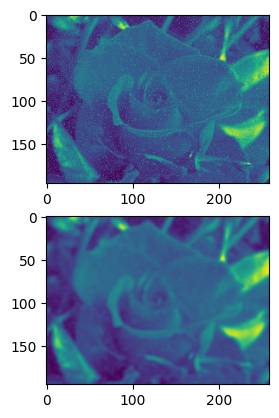

In [26]:
#BT5
##Lọc ảnh với mean filter
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys
a = iio.imread('exercise/flower.jpeg', mode = 'F')
k = np.ones((5,5))/25
b = sn.convolve(a, k).astype(np.uint8)
iio.imsave('exercise/flower.jpeg_mean_filter.jpeg', b)
print(b)
plt.subplot(2, 1, 1)
plt.imshow(a)
plt.subplot(2, 1, 2)
plt.imshow(b)
plt.show()

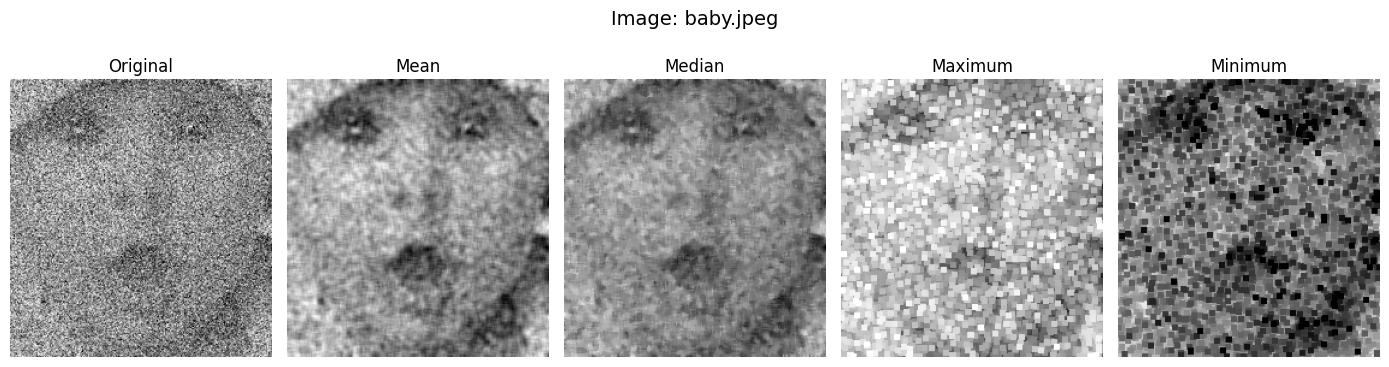

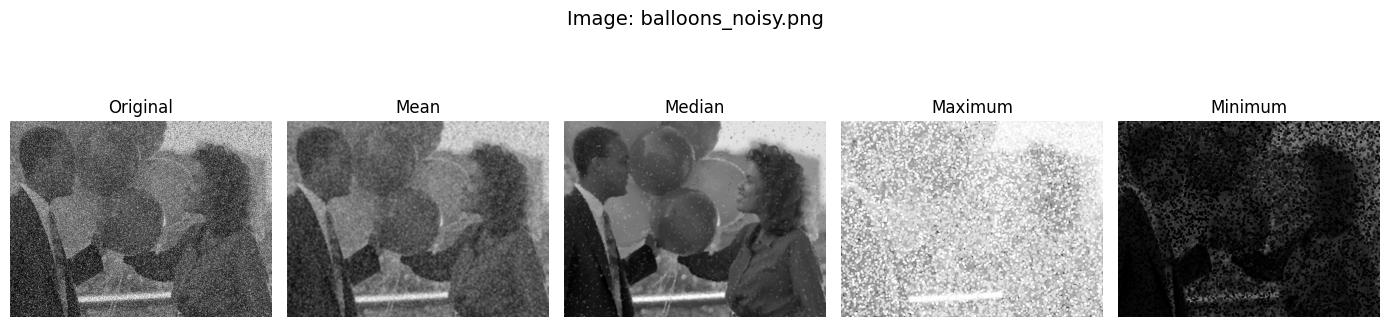

In [ ]:
#BT6
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter, minimum_filter

folder_path = 'exercise'
target_images = {'balloons_noisy.png', 'baby.jpeg'} 

image_files = [f for f in os.listdir(folder_path) if f in target_images]


for img_name in image_files:
    img_path = os.path.join(folder_path, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Áp dụng các filter
    mean = cv2.blur(img, (5, 5))
    median = cv2.medianBlur(img, 5)
    maximum = maximum_filter(img, size=5)
    minimum = minimum_filter(img, size=5)

    # Hiển thị kết quả
    plt.figure(figsize=(14, 4))
    plt.suptitle(f"Image: {img_name}", fontsize=14)

    plt.subplot(1, 5, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 5, 2)
    plt.imshow(mean, cmap='gray')
    plt.title('Mean')
    plt.axis('off')

    plt.subplot(1, 5, 3)
    plt.imshow(median, cmap='gray')
    plt.title('Median')
    plt.axis('off')

    plt.subplot(1, 5, 4)
    plt.imshow(maximum, cmap='gray')
    plt.title('Maximum')
    plt.axis('off')

    plt.subplot(1, 5, 5)
    plt.imshow(minimum, cmap='gray')
    plt.title('Minimum')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
